Modeling The Big 5 Personality Test wuth KMeans Clustering
Nathan Dunn and Paul Lussier

    Personality--one's patterns of thinking, feeling, and behaving--determines one's satisfaction and success in almost every significant domain in life. From friendships, to romantic relationships, to one's profession, a personality that matches our engagements in life is a foundational condition on which our happiness depends. However, personality is very poorly understood. When most people attempt to describe a personality, particularly their own, typically they mention something that is really just a quirk, preference, or interest. Formally(or at least academically), personality The Big Five personality traits or OCEAN model is the most robust and widely accepted paradigm in personality psychometrics to date. 
    This model consists of 5 traits on a spectrum which are Extraversion, Agreeableness, Neuroticism, Conscientiousness, and Openness. Extraversion is characterized by reactivity to external activity/stimuli/situations. Those high in extraversion tend to be more group oriented, talkative, assertive, and outwardly energetic. Neuroticism is essentially the volatility of a person's emotional state. High neuroticism is characterized by a tendency to experience negative emotions stronger and a lesser ability to deal with stress. Conscientiousness is a tendency towards self-discipline, duty, order, and an affinity for boundaries(in a variety of contexts). Agreeableness is a measure of concern for social harmony. Agreeable people are kind, trusting, warm, nurturing, and optimistic. Openness indicates an appreciation for novel experiences, beauty, creative endeavor, new ideas. People high in openess are thought to be imaginative, curious, and willing to try new things.
    Though several of these traits sound exclusively positive or negative, none of them are, and being high or low in any of them has both pros and cons. The goal of this project was to see if we could find personality 'types' or common configurations of these traits using some survey data from kaggle and kmeans clustering.


In [ ]:
!pip install seaborn
!pip install yellowbrick

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

Importing and displaying the data

In [ ]:
data = pd.read_csv("data-final.csv",delimiter="\t")
pd.options.display.max_columns = 150
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Dropping all non-question columns except for IPC and country

In [ ]:
data.drop(data.columns[50:106], axis=1, inplace=True)
data.drop(data.columns[-2:], axis=1, inplace=True)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,1,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,2,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,1,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,6,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,1,US


The IPC column refers to the number of records from that participant's IP address. This is restricted to prevent multiple tests taken by the same person being treated like multiple people.

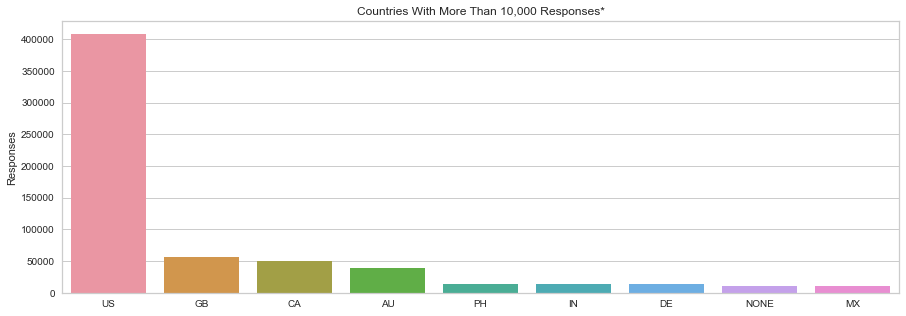

In [ ]:
data = data.loc[data["IPC"]<3]
# Creating the graph
countries = pd.DataFrame(data['country'].value_counts())
countries_10000 = countries[countries['country'] >= 10000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_10000, x=countries_10000.index, y='country')
plt.title('Countries With More Than 10,000 Responses*')
plt.ylabel('Responses');

Dropping the remaining non-numeric columns

In [ ]:
data = data.drop('country', axis=1)
data = data.drop('IPC', axis=1)

In [ ]:
columns = list(data.columns)
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)
scaled = pd.DataFrame(data, columns=columns)
sample = scaled[:10000]

In [ ]:
data = data.fillna(0)

The distortion score is the sum of squared distances from any observation to the centroid of its cluster. It is inversely related to the number of clusters and the goal is to minimize it but not create so many clusters that the categories are meaningless.

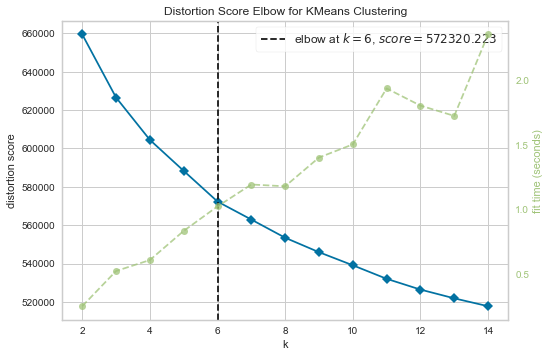

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(sample)
visualizer.poof()

6 clusters

In [ ]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,3
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,3.0,1.0,2.0,1.0,3.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,4.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,5
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015335,5.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,4.0,4
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,4
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,4
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0,3.0,0


6 clusters, fitting the unscaled and uninverted values

In [ ]:
model = data
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(model)

Predicting clusters

In [ ]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
model['Clusters'] = predictions
model.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,5
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,5
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4
5,3.0,3.0,4.0,2.0,4.0,...,5.0,4.0,5.0,2.0,4
6,4.0,3.0,4.0,3.0,3.0,...,5.0,5.0,4.0,4.0,3
7,3.0,1.0,5.0,2.0,5.0,...,4.0,3.0,4.0,5.0,4
8,2.0,2.0,3.0,3.0,4.0,...,5.0,2.0,5.0,5.0,3
9,1.0,5.0,3.0,5.0,2.0,...,4.0,3.0,3.0,3.0,0


Breakdown of all observations by our proposed 'personality types'

In [ ]:
model.Clusters.value_counts()

3    175151
4    166291
5    165685
2    157299
0    133472
1      4815
Name: Clusters, dtype: int64

These are the average responses to each statement by each cluster.

In [ ]:
pd.options.display.max_columns = 150
model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.124798,3.463408,2.761778,3.603790,2.584227,2.850665,2.084317,3.708411,2.704080,3.996321,2.425850,3.697075,3.139932,2.990125,2.377188,2.086625,2.391288,2.003491,2.694797,2.405928,3.100493,2.970675,2.671189,2.839195,3.288622,2.715596,3.159382,2.922171,2.675872,3.063294,3.258863,2.948648,3.842986,2.482970,2.412086,2.829313,3.554581,2.584220,2.856816,3.523698,3.789237,1.901133,3.831021,2.001783,3.827934,2.013898,4.120265,3.373104,3.969050,3.883399
1,0.836760,0.633022,0.508619,0.353686,0.252336,0.147040,0.107165,0.111319,0.107788,0.143510,0.732918,0.545171,0.470613,0.263344,0.178816,0.112773,0.104050,0.097612,0.110696,0.142887,0.769055,0.694704,0.367394,0.381931,0.205192,0.156179,0.099688,0.097819,0.117549,0.123572,0.788785,0.533749,0.506542,0.284735,0.177778,0.113603,0.097404,0.093666,0.106750,0.144133,0.705711,0.436345,0.417030,0.222638,0.176532,0.100519,0.098858,0.101142,0.117342,0.209138
2,1.770539,3.643291,2.194610,4.072957,2.259398,3.199874,1.716165,4.068570,2.167287,4.474974,4.262735,2.421344,4.513214,2.097826,3.574740,3.882002,3.994660,3.776413,4.004094,3.972377,2.476062,3.341146,2.599572,3.814894,2.582515,3.832497,2.737239,3.387402,3.650392,3.024641,2.768498,3.400517,3.801842,3.515636,2.050884,3.527181,3.546882,3.072562,2.714982,3.293632,3.525725,2.369023,4.073141,2.112874,3.419615,2.079454,3.680863,3.196314,4.300129,3.719235
3,3.394511,1.935370,3.740784,2.526129,4.020759,1.812448,3.596502,2.763393,3.751717,2.999144,3.790267,2.894200,4.241323,2.362407,3.269899,3.447380,3.786350,3.441779,3.619431,3.236961,2.107233,4.284320,2.626819,4.193993,1.990077,3.991893,1.850249,3.874925,4.135500,3.849798,2.933983,3.665614,3.840926,3.253433,2.187906,3.553231,3.439946,2.823684,2.866915,3.483834,3.849593,2.026611,4.296681,1.887423,3.989266,1.718603,4.022638,3.467933,4.252656,4.237064
4,3.423619,1.980835,4.310600,2.249009,4.240993,1.670806,3.839420,2.821626,3.721897,2.530588,2.303811,3.817477,3.135287,3.316295,2.106662,1.894955,2.096951,1.667084,2.109645,1.733485,1.874629,4.422506,1.821698,4.238431,1.864292,3.823123,1.600387,4.072872,4.083679,4.191117,3.709660,2.609275,4.178669,1.891203,3.115575,2.282589,3.871791,1.917933,3.547095,3.874245,3.931915,1.730190,4.084893,1.779435,4.157970,1.654618,4.333265,3.263364,4.127060,4.287941
5,2.087980,3.306540,3.053505,3.679561,2.940049,2.699454,2.176377,4.011130,2.298730,4.125708,3.529112,3.035899,4.167058,2.573269,2.844675,2.820116,2.880261,2.453113,2.984241,2.760787,1.834747,3.950364,1.672964,4.374790,1.965531,4.156647,2.001895,3.974796,4.193409,3.714905,3.810097,2.253704,4.283454,2.033992,3.212626,2.069717,4.162622,2.006337,3.794242,3.881486,3.583825,2.139826,3.885379,2.064816,3.702200,1.979509,4.002843,2.978779,4.282916,3.784332


Some statements are phrased negatively, such as "I don't have much to say" or "I often forget to put things back in their proper place". This is to say that agreeing with the statement indicates a lower score in the trait being tested for. In order to account for this we subtracted the response value from 6 in those columns, keeping the range of responses between 1 and 5 but making higher values indicate higher levels of the trait in question so that they can be summed and a score can be given.

In [ ]:
model.EXT2 = 6 - model.EXT2.values
model.EXT4 = 6 - model.EXT4.values
model.EXT6 = 6 - model.EXT6.values
model.EXT8 = 6 - model.EXT8.values
model.EXT10 = 6 - model.EXT10.values
model.EST2 = 6 - model.EST2.values
model.EST4 = 6 - model.EST4.values
model.AGR1 = 6 - model.AGR1.values
model.AGR3 = 6 - model.AGR3.values
model.AGR5 = 6 - model.AGR5.values
model.AGR7 = 6 - model.AGR7.values
model.CSN2 = 6 - model.CSN2.values
model.CSN4 = 6 - model.CSN4.values
model.CSN6 = 6 - model.CSN6.values
model.CSN8 = 6 - model.CSN8.values
model.OPN2 = 6 - model.OPN2.values
model.OPN4 = 6 - model.OPN4.values
model.OPN6 = 6 - model.OPN6.values
model

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,4
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,3.0,1.0,2.0,1.0,3.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,5
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,4.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,5
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015335,5.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,4.0,3
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,3
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,3
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0,3.0,5


Summing and scoring

In [ ]:
col_list = list(model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = model[ext].sum(axis=1)/10
data_sums['neurotic'] = model[est].sum(axis=1)/10
data_sums['agreeable'] = model[agr].sum(axis=1)/10
data_sums['conscientious'] = model[csn].sum(axis=1)/10
data_sums['open'] = model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
finaltable = data_sums.groupby('clusters').mean()
finaltable

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.463661,2.483790,2.896712,3.260388,3.887720
1,3.042409,1.314185,2.413043,2.479564,1.906625
2,2.064833,3.946106,3.465559,2.866082,3.735367
3,3.646779,3.557678,3.975605,2.945755,4.048319
4,3.828367,2.191411,4.167072,3.759603,4.102217
5,2.473425,3.083020,4.088977,3.878078,3.803612


Unfortunately, matplotlib doesn't support graphing in 5 dimensions so a bar graph will have to do.

In [ ]:
finaltable.iloc[0]

extroversion     2.463661
neurotic         2.483790
agreeable        2.896712
conscientious    3.260388
open             3.887720
Name: 0, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

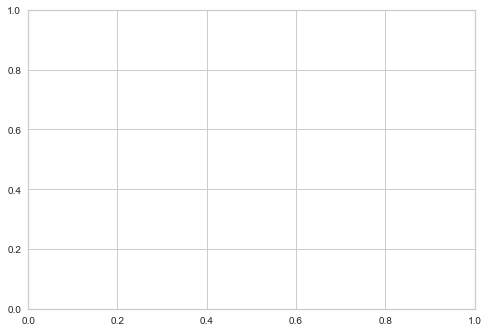

In [ ]:

labels = ['0', '1', '2', '3', '4','5']
type0 = finaltable.iloc[0]
type1 = finaltable.iloc[1]
type2 = finaltable.iloc[2]
type3 = finaltable.iloc[3]
type4 = finaltable.iloc[4]
type5 = finaltable.iloc[5]

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, type0, width, label='Type 0')
rects2 = ax.bar(x + width/2, type1, width, label='Type 1')
rects3 = ax.bar(x + 1.5*width, type2, width, label='Type 1')
rects4 = ax.bar(x + 2.5*width/2, type3, width, label='Type 1')
rects5 = ax.bar(x + 3.5*width/2, type4, width, label='Type 1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Traits by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [ ]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height. From https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

Hedges and Qualifications:
-Based on word associations
-All data was in english
-Most data was from the US